In [84]:
# Задача алгебраического интерполирования

In [85]:
f(x) = exp(x) - x

f (generic function with 1 method)

In [86]:
(a, b, mp1, n) = (2, 6, 41, 30)
@assert n <= mp1 - 1

In [87]:
# x = parse(Float64, readline())
x = 5.67

5.67

In [88]:
r = LinRange(a, b, mp1)
x_table = collect(r)
y_table = f.(x_table)

41-element Vector{Float64}:
   5.38905609893065
   6.06616991256765
   6.825013499434122
   7.674182454814718
   8.623176380641604
   9.682493960703473
  10.863738035001687
  12.17973172487283
  13.644646771097054
  15.274145369443067
  17.085536923187668
  19.097951281441635
  21.332530197109342
   ⋮
 129.3897796849354
 143.4131591025766
 158.92190729990185
 176.07224187515138
 195.03680997479145
 216.00641620418696
 239.19193226422038
 264.82640742615274
 293.1674009670606
 324.49955990964827
 359.13746786532863
 397.4287934927351

In [89]:
full_table = [el for el in zip(x_table, y_table)]
pred = elem -> abs(elem[1] - x) # sort by closest element
sort!(full_table, by=pred)
chopped_table = collect(Iterators.take(full_table, n + 1))
chopped_x_table = collect(map(el -> el[1], chopped_table))
chopped_y_table = collect(map(el -> el[2], chopped_table))

#sort back?
#chopped_table = collect(zip(chopped_x_table, chopped_y_table))
#sort!(chopped_table)
#chopped_x_table = collect(map(el -> el[1], chopped_table))
#chopped_y_table = collect(map(el -> el[2], chopped_table))

31-element Vector{Float64}:
 293.1674009670606
 264.82640742615274
 324.49955990964827
 239.19193226422038
 359.13746786532863
 216.00641620418696
 397.4287934927351
 195.03680997479145
 176.07224187515138
 158.92190729990185
 143.4131591025766
 129.3897796849354
 116.71041751873476
   ⋮
  56.240287597362
  50.598150033144236
  45.50244910553015
  40.90118449330084
  36.747304360067375
  32.99823444367801
  29.61545195869231
  26.564100047396998
  23.812638920657893
  21.332530197109342
  19.097951281441635
  17.085536923187668

In [90]:
using Pkg
Pkg.add("Polynomials")
Pkg.add("SpecialPolynomials")


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [91]:
using Polynomials, SpecialPolynomials
lagrange = fit(Lagrange, chopped_x_table, chopped_y_table)
lp = convert(Polynomial, lagrange)
display("text/latex", lagrange)
err_lagrange = abs(lagrange(x) - f(x)) / f(x)
println("$(err_lagrange*100) %")

3.6121261781534464e-11 %


In [92]:
using Polynomials, SpecialPolynomials
newton = fit(Newton, chopped_x_table, chopped_y_table)
np = convert(Polynomial, newton)
display("text/latex", newton)
err_newton = abs(newton(x) - f(x)) / f(x)
println("$(err_newton*100) %")

1.4592430050094168e-12 %


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


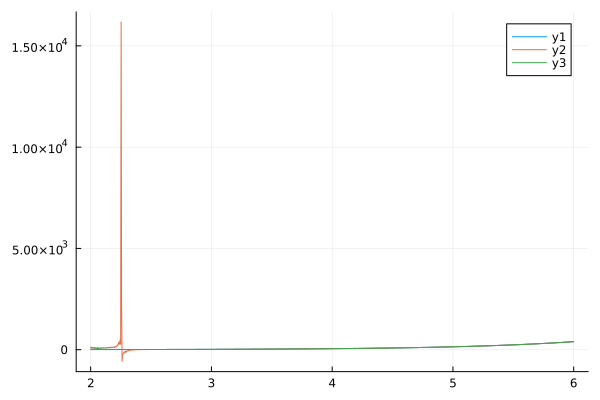

In [93]:
Pkg.add("Plots")
using Plots
r = LinRange(a, b, 1000)
x_table = collect(r)
true_table = f.(x_table)
ltable = lagrange.(x_table)
ntable = newton.(x_table)
plot(x_table, [true_table, ltable,  ntable])